In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.chdir("C:/Users/Abhishek/Desktop/UpGrade/Day 34 NLP")

In [2]:
data = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t" ,quoting=3) #quoting=3 means remove all Quotes i.e ""
#QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Need to convert Review Column from Text to vectors to give it to ML Model.

In [3]:
print("\n Shape",data.shape)
print("\n NULL VALUES \n ",data.isna().sum())
print("\n Data TYPES",data.dtypes)

#No Null Data.


 Shape (1000, 2)

 NULL VALUES 
  Review    0
Liked     0
dtype: int64

 Data TYPES Review    object
Liked      int64
dtype: object


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.head(5)
# 1 : Positive Review
# 2 : Negative Review

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.Liked.value_counts()
#Equally Distributed Data.

1    500
0    500
Name: Liked, dtype: int64

### Let us try to Apply all the pre-processing on 1 sentence. After we are sure it is working,We will use a for loop to apply this on all the Data.

In [7]:
import nltk
import re
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
a=data.Review[0]
a

'Wow... Loved this place.'

In [9]:
#1.Remove Numbers and Punctuations.
a=re.sub("[^a-zA-Z]"," ",a) #[^a-zA-Z] Means Everything Other Than a-z and A-Z.
a=a.lower() #2.Convert All to lowerCase.
a=a.split()
a=[word for word in a if not word in STOPWORDS] #Remove Stopwords using List Comprehension (To avoid For Loop).
a

['wow', 'loved', 'place']

### Stemming,Lematization.

- Stemming :- get Root form  form of the word. Ex Loved to love, Played to play etc.
  - We might get the wrong word as it just chops
  - Leaves will become leav which does not make any sense.
  
  
- Lematization :- it gets root of the word ans also looks at its close meaning. Therefore it is better & we prefer that.
  - Here leaves will become leaf which is correct

In [10]:
from nltk.stem.porter import PorterStemmer

PS=PorterStemmer()

a=" ".join([PS.stem(word) for word in a])
a

'wow love place'

### Convert to Vector now.

- We use BOW 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus1=[]
CV=CountVectorizer(max_features=3)

print("a : ",a)
corpus1.append(a)
print("Corpus : ",corpus1)

X=CV.fit_transform(corpus1) # Whichever we data we use to fit_transform will be the corpus of our model.
print(X.toarray())

a :  wow love place
Corpus :  ['wow love place']
[[1 1 1]]


## Looks fine, so do this on the whole Data.

In [12]:
def preprocess(data):
    a=str(data)
    a=re.sub("[^a-zA-Z]"," ",a) #[^a-zA-Z] Means Everything Other Than a-z and A-Z.
    a=a.lower() #2.Convert All to lowerCase.
    #a=a.split()
    a=[word for word in a.split() if not word in STOPWORDS] #Remove Stopwords using List Comprehension (To avoid For Loop).
    a=" ".join([PS.stem(word) for word in a])
    
    return a

In [13]:
# use preprocess function to preprocess the data.
data["Review"] = data["Review"].apply(lambda x : preprocess(x))
data.head(5)

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


In [14]:
# vecorize the data using Count vector
CV = CountVectorizer(max_features=50)
data_CV = CV.fit_transform(data["Review"])  #  Data is stored in data_CV, this will be given to ML model.

print(data_CV.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### To vicualise the output of BOW:

- Tranform some data using out fitted model.
- Make Dataframe where data is displayed usinf toarray() and columns are the features of our Model.

In [15]:
demo = CV.transform(data["Review"])

In [16]:
# To see Output of BOW
CV_DF = pd.DataFrame(demo.toarray(),columns=CV.get_feature_names())
CV_DF

,also,amaz,back,bad,best,came,chicken,come,definit,delici,...,servic,staff,star,steak,tast,time,us,vega,wait,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Data For ML

In [25]:
X= data_CV
X=X.toarray()

In [28]:
y=data["Liked"].values
print(type(y))
y

<class 'numpy.ndarray'>


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [29]:
# Train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 50)
(300, 50)
(700,)
(300,)


In [30]:
# Fit model,Predict,Check accuracy etc.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

model = GaussianNB()
y_pred = model.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.6833333333333333

In [31]:
confusion_matrix(y_test,y_pred)

array([[128,  24],
       [ 71,  77]], dtype=int64)

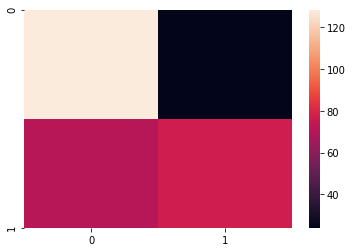

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred))